<a href="https://colab.research.google.com/github/adeeconometrics/literate-programming/blob/main/Probability_Distributions_Continuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO
Improve template it should be 

- section
    - brief description {assumptions, use-cases}
    - definition & parameters with definition on their bounds
    - implementation 
        - naive method
        - symbolic method
        - numerical method

# Continuous Probability Distributions
by Dave Amiana

The purpose of this notebook is to introduce and explore some probability models for continuous variabbles; this can be seen as an extension of models in the discrete space.

The following probability distributions that we shall explore in this notebook are listed as follows:

- Normal-distribution
    - standard normal distribution
- t-distribution
    - Cauchy distribution:: TODO
- F-distribution
- $\chi^2$ distribution
- $\Gamma$ distribution
- Pareto distribution
- Log-Normal distribution
- Non-central $\chi^2$ distribution

We will explore the derivation of these distributions, their motvation, assumptions, and applications. 

In [1]:
# import relevant packages
import matplotlib.pyplot as plt
import numpy as np
from sympy import init_printing, lambdify, N, gamma, beta, oo
import sympy as sp
import scipy as sci
import scipy.integrate as integrate 
import scipy.special as ss

sp.init_printing() 

In [ ]:
x,y,z = sp.symbols('x,y,z')

#Fundamental Functions

Before we begin our exploration with implementing probability distirbutions functionally, we are welcomed with the following functions and their corresponding definitions. 

- gamma function
$${\displaystyle \Gamma (z)=\int _{0}^{\infty }x^{z-1}e^{-x}\,dx,\ \qquad \Re (z)>0\ .}$$
- beta function
$${\displaystyle \mathrm {B} (x,y)=\int _{0}^{1}t^{x-1}(1-t)^{y-1}\,dt}$$
- incomplete gamma function
    - upper incomplete 
    $$ \Gamma(s,x) = \int_x^{\infty} t^{s-1}e^{-t}{\rm d}t $$
    - lower incomplete
    $$  \gamma(s,x) = \int_0^x t^{s-1} e^{-t}\{\rm d}t $$
- incomplete beta function
$${\displaystyle \mathrm {B} (x;\,a,b)=\int _{0}^{x}t^{a-1}\,(1-t)^{b-1}\,dt}$$

### $\Gamma$-function:

$$\Gamma(x) := \int^{\infty}_{0} t^{x-1} e^{-t} \mathrm{d}t.$$

In [ ]:
# naive symbolic implementation
def g(x):
    return N(sp.Integral(t**(x-1)*E**(- t),(t,0, oo)))
g(sp.pi)

In [ ]:
# implementation in Sympy
N(gamma(pi))

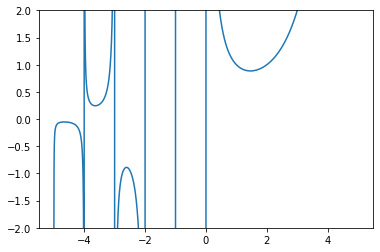

In [ ]:
# plotting the gamma function using scipy

x = np.linspace(-5, 5, 10000)
γ = np.array([gamma(i) for i in x])

plt.plot(x, γ)
plt.ylim(-2,2)

In [ ]:
# naive numerical method for Gamma function
def gamma(x):
    g = lambda _x,t: t**(_x-1)*np.exp(-t**2)
    return sci.integrate.quad(g, 0, np.inf, args=x)

gamma(np.pi)

OverflowError: ignored

In [ ]:
# Γ function definition of PDF
expr = (sp.gamma((df+1)/2)/(sp.sqrt(df*sp.pi)*(sp.gamma(df/2))))*(1+(t**2/df))**(-(df+1)/2)
k = sp.lambdify([df,t], expr, "sympy")
res  = k(1,.1)
N(res)

### The $\beta$ - function:
$${\displaystyle \mathrm {B} (x,y)=\int _{0}^{1}t^{x-1}(1-t)^{y-1}\,dt}$$

In [ ]:
# β function definition of PDF
B  = lambda x_0, y_0: sp.Integral(t**(x_0-1)*(1-t)**(y_0-1), (t,0,1))
N(B(3,4))

In [ ]:
# β function implementation in SymPy
N(sp.beta(3,4))

In [ ]:
# numerical method: FIX THIS
def beta(x_0,y_0):
    expr = lambda x0,y0,t0: t0**(x0-1)*(1-t0)**(y0-1)
    return sci.integrate.quad(expr, 0,1, args=(x_0,y_0))

In [ ]:
beta(3,4)

In [ ]:
sci.special.beta(3,4)

## Continuous Uniform Distribution

#### Definition

Probability Density Function
$$f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}}$$

parameters:
- $-\infty< a<b < \infty$ boundary of the distribution
- $x$ random variable
----
Cumulative Distribution Function
$$F(x)={\begin{cases}0&{\text{for }}x<a\\[8pt]{\frac {x-a}{b-a}}&{\text{for }}a\leq x\leq b\\[8pt]1&{\text{for }}x>b\end{cases}}$$

parameters:
- $-\infty< a<b < \infty$ boundary of the distribution
- $x$ random variable

In [ ]:
def uniform_dist_pdf(a,b, x):
    if (x<a or x>b):
        return 0
    else:
        return 1/(b-a)

def uniform_dist_cdf(a,b, x):
    if (x<a):
        return 0
    elif (x>b):
        return 1
    else: 
        return (x-a)/(b-a)

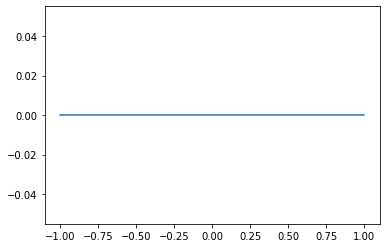

In [ ]:
# visualizing pdf

a=3;b=5;x_val = 1
x_unif = np.linspace(-x_val, x_val, 100)
y_unif_pdf = np.array([uniform_dist_pdf(a,b,i) for i in x_unif])

plt.plot(x_unif, y_unif_pdf)

In [ ]:
np.cumsum(y_unif_pdf)[-1] # should be very close to 1

0

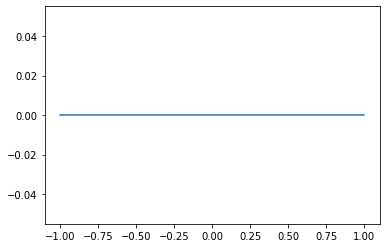

In [ ]:
# visualizing cdf
y_unif_cdf = np.array([uniform_dist_cdf(a,b,i) for i in x_unif])

plt.plot(x_unif, y_unif_pdf)

In [ ]:
y_unif_cdf[-1]  # should be very close to 1

0

## The Normal Distribution

Definition

Probability Density Function
$${\displaystyle {\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

parameters:
- $\mu$ - mean
- $x$ - random variable
- $\sigma$ - standard deviation
----
Cumulative Distribution Function
$${\displaystyle \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int _{-\infty }^{x}e^{-t^{2}/2}\,dt}$$

parameter:
- $x$ - random variable

The above integral cannot be expressed in terms of elementary functions, and are often said to be [special functions](https://en.wikipedia.org/wiki/Special_function). 

In [ ]:
def normal_dist_f(x):
    return 1/(np.sqrt(2*np.pi))*np.power(np.e, -1/2*x**2)

In [ ]:
# PDF given x
def norm_dist_pdf(x, mean, std):
    return (1/(np.sqrt(2*np.pi * np.power(std, 2))))* np.power(np.e, -(np.power((x - mean), 2) / (2 * np.power(std, 2))))

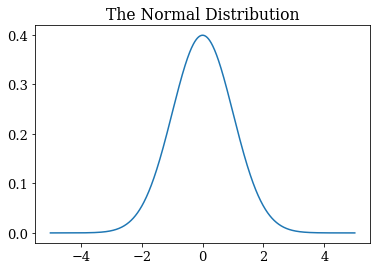

In [ ]:
# plotting the pdf
mean = 0; std = 1
x_norm = np.linspace(-5,5,1000)
y_norm_f =  np.array([norm_dist_pdf(x_i, mean, std) for x_i in x_norm])

plt.title("The Normal Distribution")
plt.plot(x_norm,y_norm_f)

In [ ]:
np.cumsum(y_norm_f)[-1]

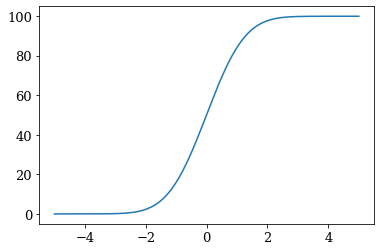

In [ ]:
plt.plot(x_norm,np.cumsum(y_norm_f))

In [ ]:
# introduce relevant symbol
t = sp.symbols("t")

In [ ]:
# CDF - test this function
def norm_dist_cdf(*x_0, lower="-oo", upper=None):
    if(upper==None):
        cdf = 1/(sp.sqrt(2*sp.pi))* sp.integrate(sp.exp(-t/2),(x, lower, x_0))
        return cdf
    else:
        cdf = 1/(sp.sqrt(2*sp.pi))* sp.integrate(sp.exp(-t/2),(x, lower, upper))
        return cdf

In [ ]:
N(norm_dist_cdf(upper=oo))

In [ ]:
sp.exp(-1/2)

In [ ]:
#numerical method 
def norm_dist_cdf_num(*x_0, lower=-np.inf, upper=None):
    _expr = lambda _t: np.exp(-_t/2)
    if(upper==None):
        cdf = 1/(np.sqrt(2*np.pi))* sci.integrate.quad(_expr, lower,upper)[0]
        return cdf
    else:
        cdf = 1/(np.sqrt(2*np.pi))* (sci.integrate.quad(_expr, lower,upper)[0])
        return cdf

In [ ]:
norm_dist_cdf_num(0)

TypeError: ignored

In [ ]:
# plotting CDF
def norm_dist_cdf_plot(_x):
    pass

In [ ]:
# transforming normal distributions to standard normal through z-scores


## T distribution

Definition

Probability Density Function
$$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}},\!$$

where $v$ is the number of degrees of freedom and $\Gamma$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function).

The density function of the t-distribution may also be written in terms of the $\beta$ -function. 

$$f(t) = \frac{1}{\sqrt{\nu}\,\mathrm{B} (\frac{1}{2}, \frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}\!,$$

where B is the [beta-function](https://en.wikipedia.org/wiki/Beta_function). 

----
Cumulative Distribution Function:

The cumulative distribution function can be written in terms of I, the regularized incomplete beta function. For t > 0,

$${\displaystyle F(t)=\int _{-\infty }^{t}f(u)\,du=1-{\tfrac {1}{2}}I_{x(t)}\left({\tfrac {\nu }{2}},{\tfrac {1}{2}}\right),}$$

where

$$x(t) = \frac{\nu}{{t^2+\nu}}$$

Other values would be obtained by symmetry. An alternative formula, valid for $t^2 < \nu$, is

$${\displaystyle \int _{-\infty }^{t}f(u)\,du={\tfrac {1}{2}}+t{\frac {\Gamma \left({\tfrac {1}{2}}(\nu +1)\right)}{{\sqrt {\pi \nu }}\,\Gamma \left({\tfrac {\nu }{2}}\right)}}\,{}_{2}F_{1}\left({\tfrac {1}{2}},{\tfrac {1}{2}}(\nu +1);{\tfrac {3}{2}};-{\tfrac {t^{2}}{\nu }}\right),}$$

where $_ 2F_1$ is a particular case of the hypergeometric function.

For implementing this distribution, we will use a library in SymPy to define the gamma function and beta-function symbolically. 


In [ ]:
# introduct symbols
df, t = sp.symbols("v, t")

### PDF of T-distribution
$$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}\!$$

In [ ]:
# definition of the pdf - for graphing the distirbution
def t_dist_pdf(df, t):
    val = sp.gamma((df+1)/2)/(sp.sqrt(df*sp.pi)*sp.gamma(df/2))*(1+(t**2/df))**(-((df+1)/2))
    return N(val)

In [ ]:
# numerical method

### CDF of T-distribution
$$\int_{-\infty}^{t} f(x,t) dt$$

In [ ]:
# definition of the cmf -  for finding the probability values
def t_dist_cdf(df, *a, lower = "-oo", upper=None):
    expr = sp.gamma((df+1)/2)/(sp.sqrt(df*sp.pi)*sp.gamma(df/2))*(1+(t**2/df))**(-((df+1)/2))
    if(upper==None):
        val = sp.Integral(expr, (t,lower,a))
    if(upper!=None):
         val = sp.Integral(expr, (t,lower,upper))
    return N(val)

# t_dist_cdf(10, lower=-1, upper=1)

In [ ]:
# to-do: improve function as lambda function with loc and scale, and shading
# plotting the t-distribution
from scipy.special import gamma 

def t_dist_np(x, t=0): # loc, scale, df
    val = gamma((x+1)/2)/(np.sqrt(x*np.pi)*gamma(x/2))*(1+(t**2/x))**(-((x+1)/2))
    return val

x = np.linspace(-5,5, 10000)
y = np.array([t_dist_np(1,i) for i in x])

plt.plot(x,y)

$$F_r(t) = \frac{1}{2}+ \frac{1}{2} \left[I \left(1; \frac{1}{2} r, \frac{1}{2} \right) - I \left(  \frac{r}{r+t^2} ;  \frac{1}{2} r,  \frac{1}{2}\right) \right]*sgn(t)$$

In [8]:
# another cdf definition from https://mathworld.wolfram.com/Studentst-Distribution.html

def t_cdf(df, x):
    reg_beta = lambda z, a,b: ss.betainc(a,b,z)/ss.beta(a,b)
    return 0.5+0.5*(reg_beta(1,0.5*df,0.5)-reg_beta(df/(df+x**2), 0.5*df, 0.5))*np.sign(x)

In [9]:
t_cdf(12, 1)

this plot seems to be indicative behavior that the `t_cdf` function is not well-defined. 

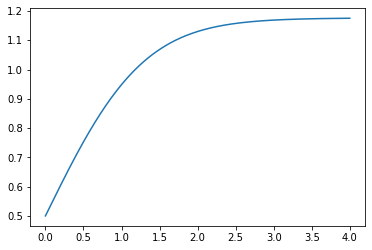

In [12]:
df = 12
x = np.linspace(0,4,1000)
y = np.array([t_cdf(df, i) for i in x])

plt.plot(x,y)

### F-distribution
Fisher–Snedecor distribution (after Ronald Fisher and George W. Snedecor) is a continuous probability distribution that arises frequently as the null distribution of a test statistic, most notably in the analysis of variance (ANOVA), e.g., F-test.

----
Definition:


Probability Density Function:

If a random variable $X$ has an F-distribution with parameters $d_1$ and $d_2$, we write X~F(d₁,d₂). Then the probability density function for X is given by:

$${\displaystyle {\begin{aligned}f(x;d_{1},d_{2})&={\frac {\sqrt {\frac {(d_{1}x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\\&={\frac {1}{\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\left({\frac {d_{1}}{d_{2}}}\right)^{\frac {d_{1}}{2}}x^{{\frac {d_{1}}{2}}-1}\left(1+{\frac {d_{1}}{d_{2}}}\,x\right)^{-{\frac {d_{1}+d_{2}}{2}}}\end{aligned}}}$$

for real x>0. Where B is the beta function. 

Cummulative Density Function:

$$F(x;d_{1},d_{2})=I_{{{\frac  {d_{1}x}{d_{1}x+d_{2}}}}}\left({\tfrac  {d_{1}}{2}},{\tfrac  {d_{2}}{2}}\right),$$
where I is the regularized [incomplete beta function](https://en.wikipedia.org/wiki/Regularized_incomplete_beta_function).


In [ ]:
# initialize symbols
a,b = sp.symbols("a b")

### Incomplete $\beta$- function:

$${\displaystyle \mathrm {B} (x;\,a,b)=\int _{0}^{x}t^{a-1}\,(1-t)^{b-1}\,dt.}$$

In [ ]:
# Prototypical implementation
def incomplete_beta(x_0,a_0,b_0):
    expr = t**(a_0-1)*(1-t)**(b_0-1)
    return N(sp.integrate(expr, (t, 0, x_0)))

In [ ]:
# implementation from SciPy
def incomplete_beta_num(x_0, a_0, b_0):
    expr = lambda t_0: t_0**(a_0-1)*(1-t_0)**(b_0-1)
    return sci.integrate.quad(expr, 0, x_0)[0]

In [ ]:
incomplete_beta(3,4,5)

In [ ]:
incomplete_beta_num(3,4,5)

$${\displaystyle {\begin{aligned}f(x;d_{1},d_{2})&={\frac {\sqrt {\frac {(d_{1}x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\\&={\frac {1}{\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\left({\frac {d_{1}}{d_{2}}}\right)^{\frac {d_{1}}{2}}x^{{\frac {d_{1}}{2}}-1}\left(1+{\frac {d_{1}}{d_{2}}}\,x\right)^{-{\frac {d_{1}+d_{2}}{2}}}\end{aligned}}}$$

In [ ]:
# pdf
def f_dist_pdf(x_0, d1, d2):
    return np.sqrt(((d1*x_0)**d1*d2**d2)/(d1*x_0+d2)**(d1+d2))/((x_0)*incomplete_beta_num(x_0, d1/2, d2/2)) 

In [ ]:
f_dist_pdf(1,2,3)

In [ ]:
def test_f(x_0,d1,d2):
    return np.sqrt(((d1*x_0)**d1*d2**d2)/(d1*x_0+d2)**(d1+d2))/((x_0)*sci.special.beta(d1/2, d2/2)) 

test_f(1,2,3)

In [ ]:
x_f = np.linspace(1,5,1000)
y_f = np.array([f_dist_pdf(i, 2,3) for i in x_f])

plt.plot(x_f,y_f)

TypeError: ignored

In [ ]:
# cdf
def f_dist_cdf():
    pass

In [ ]:
# difference between 2 variances

## $\chi^2$ Distribution

Definition

Probability Density Function

The probability density function (pdf) of the chi-square distribution is

$${\displaystyle f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}}}$$

where ${\textstyle \Gamma (k/2)}$ denotes the gamma function, which has closed-form values for integer $k$.


Commulative Density Function
$$F(x;\,k)={\frac {\gamma ({\frac {k}{2}},\,{\frac {x}{2}})}{\Gamma ({\frac {k}{2}})}}=P\left({\frac {k}{2}},\,{\frac {x}{2}}\right),$$

where ${\displaystyle \gamma (s,t)}$ is the lower incomplete gamma function and ${\textstyle P(s,t)}$ is the regularized gamma function.


In [ ]:
# introduce symbol
k = sp.Symbol(k)

In [ ]:
# pdf 
def chi_dist_pdf(x,k):
    return (1/(np.power(2,(k/2)-1)*ss.gamma(k/2)))*np.power(x,k-1)*np.exp(-x**2/2)

In [ ]:
# cdf
def chi_dist_pdf(x_0,k_0):
    return ss.gammainc(k_0/2, x/2)/ss.gamma(k/2)

## $\Gamma$-Distribution

- Case 1: $k>0 \text{ shape};\ \theta>0 \text{ scale}$
- Case 2: $a>0 \text{ shape}; \beta>0  \text{ scale}$

Definitions

Probability Density Function:

Case 1: 
$${\displaystyle f(x)={\frac {1}{\Gamma (k)\theta ^{k}}}x^{k-1}e^{-{\frac {x}{\theta }}}}$$

Case 2:
$$	{\displaystyle f(x)={\frac {\beta ^{\alpha }}{\Gamma (\alpha )}}x^{\alpha -1}e^{-\beta x}}$$

Parameter
- $x\in (0, \infty)$ is the random variable
----
Cumulative Distribution Function

Case 1:
$${\displaystyle F(x)={\frac {1}{\Gamma (k)}}\gamma \left(k,{\frac {x}{\theta }}\right)}$$

Case 2:
$$	{\displaystyle F(x)={\frac {1}{\Gamma (\alpha )}}\gamma (\alpha ,\beta x)}$$

Parameter
- $x\in (0, \infty)$ is the random variable

In [ ]:
def gamma_pdf_c1(k, theta, x):
    scale  = np.power(x,k-1)*np.exp(-x/theta)
    return (1/(ss.gamma(k)*np.power(theta,k)))*scale

In [ ]:
def gamma_pdf_c2(a, beta, x):
    scale  = np.power(x,a-1)*np.exp(-x*beta)
    return (1/(ss.gamma(a)*np.power(beta,a)))*scale

In [ ]:
def gamma_cdf_c1(k, theta, x):
    return (1/ss.gamma(k))*ss.gammaic(k, x/theta)

In [ ]:
def gamma_cdf_c1(a, beta, x):
    return (1/ss.gamma(a))*ss.gammaic(a, x*beta)

## Pareto Distribution

Definitions

Probability Density Function:
$$f_X(x)= \begin{cases} \frac{\alpha x_\mathrm{m}^\alpha}{x^{\alpha+1}} & x \ge x_\mathrm{m}, \\ 0 & x < x_\mathrm{m}. \end{cases} $$

- $x$ is the random variable
- $k$ is the lower bound of the data
- $α$ is the shape parameter
- $x_m$ is the minimum possible value of $x$
----
Cumulative Distribution Function

$$F_X(x) = \begin{cases}
1-\left(\frac{x_\mathrm{m}}{x}\right)^\alpha & x \ge x_\mathrm{m}, \\
0 & x < x_\mathrm{m}.
\end{cases}$$

- $x$ is the random variable
- $k$ is the lower bound of the data
- $α$ is the shape parameter
- $x_m$ is the minimum possible value of $x$

In [ ]:
def pareto_df(data,x,a):
        # x ∈ data
        if(x>=min(data)):
            return (a*np.power(min(data), a))/(np.power(x,a+1))
        else:
            return 0

In [ ]:
def pareto_cdf(data,x,a):
    # x ∈ data
    if(x>=min(data)):
        return (1-np.power(min(data)/x, a))
    else:
        return 0

## Log-Normal Distribution

Definitions

Probability Density Function

Parameters

----
Cumulative Distribution Function

Parameters

## Non-central $\chi^2$ distribution
the noncentral chi-square distribution (or noncentral chi-squared distribution, noncentral $\chi ^{2}$ distribution) is a noncentral generalization of the chi-square distribution. 

Definitions

Probability Density Function

$$f_{X}(x;k,\lambda )=\sum _{i=0}^{\infty }{\frac {e^{-\lambda /2}(\lambda /2)^{i}}{i!}}f_{Y_{k+2i}}(x)$$

Parameters:
- $Y_q$ is distributed as chi-square with $q$ degrees of freedom
- $\lambda$ [noncentrality parameter](https://en.wikipedia.org/wiki/Noncentrality_parameter):
$$\lambda =\sum _{i=1}^{k}\mu _{i}^{2}$$
- $k$ degrees of freedom
- $x$ random variable

----
Cumulative Distribution Function
$$1-Q_{\frac {k}{2}}\left({\sqrt {\lambda }},{\sqrt {x}}\right) $$
with [Marcum Q-function](https://en.wikipedia.org/wiki/Marcum_Q-function) $Q_{M}(a,b)$

$${\displaystyle {\begin{aligned}Q_{M}(a,b)&=1-e^{-a^{2}/2}\sum _{k=0}^{\infty }\left({\frac {a^{2}}{2}}\right)^{k}{\frac {\gamma (M+k,{\frac {b^{2}}{2}})}{k!\Gamma (M+k)}}\\[6pt]&=1-e^{-a^{2}/2}\sum _{k=0}^{\infty }\left({\frac {a^{2}}{2}}\right)^{k}{\frac {P(M+k,{\frac {b^{2}}{2}})}{k!}}\end{aligned}}}$$

Parameters:
- $\lambda$ [noncentrality parameter](https://en.wikipedia.org/wiki/Noncentrality_parameter):
- $k$ degrees of freedom
- $x$ random variable

# Double Exponential (Gumbell) Distribution

---
Parameters:
- $\mu$ location
- $\beta >0$ scale
- $x\in \mathbb{R}$ random variable

PDF:
$$f(x; \mu, \beta)={\displaystyle {\frac {1}{\beta }}e^{-(z+e^{-z})}}$$
where $z = \frac{x-\mu}{\beta}$

CDF:
$$F(x;\mu ,\beta )=e^{{-e^{{-(x-\mu )/\beta }}}}$$
Mean: $\mu+\beta \gamma$ where $\gamma$ is the Euler-Mascheroni constant

Median:${\displaystyle \mu -\beta \ln(\ln 2)}$

Mode:$\mu$

Variance:${\displaystyle {\frac {\pi ^{2}}{6}}\beta ^{2}}$

Skewness:${\displaystyle {\frac {12{\sqrt {6}}\,\zeta (3)}{\pi ^{3}}}\approx 1.14}$

Kurtosis:${\frac  {12}{5}}$


In [ ]:
mu = float(input())
beta = float(input())

0.5
2


In [ ]:
def gumbell_pdf(mu, beta, x):
    z = (x-mu)/beta
    return (1/beta)*np.exp(-z-np.exp(-z))

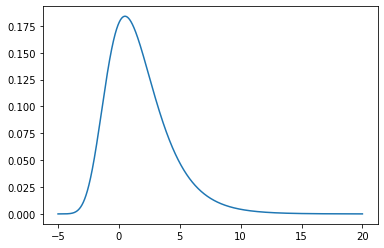

In [ ]:
# plot pdf
x = np.linspace(-5, 20, 10000)
y_g_pdf=np.array([gumbell_pdf(mu, beta, i) for i in x])

plt.plot(x, y_g_pdf)

In [ ]:
def gumbell_cdf(x, mu, beta):
    return np.exp(-np.exp(-(x-mu)/beta))

#####issue: apparently there exist a discrepancy between p_value (i.e. integral of the pdf) and cdf. 

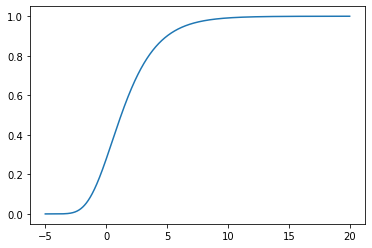

In [ ]:
# plot cdf
x = np.linspace(-5, 20, 100000)
y_g_cdf=np.array([gumbell_cdf(i, mu, beta) for i in x])

plt.plot(x, y_g_cdf)

In [ ]:
gumbell_cdf(1,mu, beta)

In [ ]:
# check this first
def gumbell_p(x_lower=-np.inf, x_upper=0):
    return integrate.quad(gumbell_pdf, x_lower, x_upper, args=(mu, beta))[0]

In [ ]:
gumbell_p(x_upper=1)

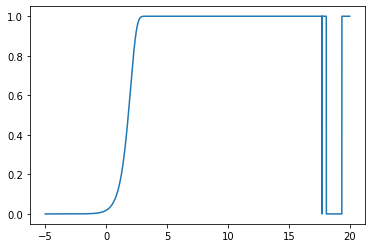

In [ ]:
# plot p_value
x_p = np.linspace(-5, 20, 100000)
y_g_p=np.array([gumbell_p(x_upper=i) for i in x_p])

plt.plot(x_p, y_g_p)

In [ ]:
class Gumbell:
    def __init__(self, location, scale, randvar):
        self.location = location
        self.scale = scale
        self.randvar = randvar
    def pdf(self):
        pass
    def cdf(self):
        pass 
    def mean(self):
        return self.location+(self.scale*np.euler_gamma)
    def median(self):
        return self.location - (self.scale*np.log(np.log(2)))
    def mode(self):
        return self.location
    def var(self):
        return (np.pi**2/6)*self.scale**2
    def skewness(self):
        return 1.14
    def kurtosis(self):
        return 12/5
    def print_summary(self):
        mean = self.mean()
        median = self.median()
        mode = self.mode()
        var = self.var()
        skewness = self.skewness()
        kurtosis = self.kurtosis()
        cstr = "summary statistic"
        print(cstr.center(40, "="))
        return print("mean: ", mean, "\nmedian: ", median, "\nmode: ", mode, "\nvar: ", var, "\nskewness: ", skewness, "\nkurtosis: ", kurtosis)

In [ ]:
gumbell_obj = Gumbell(mu, beta, 3)
gumbell_obj.print_summary()

===========summary statistic============
mean:  1.6544313298030657 
median:  1.2330258411633288 
mode:  0.5 
var:  6.579736267392906 
skewness:  1.14 
kurtosis:  2.4


# Tukey-Lambda Distribution

---
Parameters:

PDF:

CDF:

Mean:

Median:

Mode:

Variance:

Skewness:

Kurtosis:


# Power Normal Distribution (Generalized Normal distirbution v1)
The generalized normal distribution or generalized Gaussian distribution (GGD) is either of two families of parametric continuous probability distributions on the real line. Both families add a shape parameter to the normal distribution. To distinguish the two families, they are referred to below as "version 1" and "version 2". 

Reference: https://en.wikipedia.org/wiki/Generalized_normal_distribution

---
Parameters:
- $\mu$ location
- $\alpha$ scale
- $\beta$ shape
- $x \in \mathbb{R}$ random variable

PDF:
$$f(x; \mu, \alpha, \beta) = \frac{\beta}{2\alpha\Gamma(1/\beta)} \; e^{-(|x-\mu|/\alpha)^\beta}$$
CDF:
$$f(x; \mu, \alpha, \beta) = {\displaystyle {\frac {1}{2}}+{\frac {{\text{sign}}(x-\mu )}{2}}{\frac {1}{\Gamma \left({\frac {1}{\beta }}\right)}}\gamma \left({\frac {1}{\beta }},x\alpha ^{\beta }\right)}$$
Mean:$\mu$

Median:$\mu$

Mode:$\mu$

Variance:$\frac{\alpha^2\Gamma(3/\beta)}{\Gamma(1/\beta)}$

Skewness:$0$

Kurtosis:$\frac{\Gamma(5/\beta)\Gamma(1/\beta)}{\Gamma(3/\beta)^2}-3$


In [ ]:
def power_normalv1_pdf(mu, alpha, beta, x):
    return (beta/(2*alpha*ss.gamma(1/beta)))*np.exp((-abs(x-mu)/alpha)**beta)

In [ ]:
def power_normalv1_cdf(mu, alpha, beta, x):
    return 1/2+((np.sign(x-mu)/2)*(1/ss.gamma(1/beta))*ss.gammainc(1/beta, x*alpha**beta))

In [ ]:
class Power_normalv1:
    def __init__(self, location, scale, shape, randvar):
        self.location = location
        self.scale = scale
        self.shape = shape
        self.randvar = randvar
    def pdf(self):
        pass
    def cdf(self):
        pass 
    def mean(self):
        return self.location
    def median(self):
        return self.location
    def mode(self):
        return self.location
    def var(self):
        alpha = self.scale
        beta = self.shape
        return (alpha**2*ss.gamma(3/beta))/ss.gamma(1/beta)
    def skewness(self):
        return 0
    def kurtosis(self):
        beta = self.shape
        return (ss.gamma(5/beta)*ss.gamma(1/beta))/(ss.gamma(3/beta)**3)-3
    def print_summary(self):
        mean = self.mean()
        median = self.median()
        mode = self.mode()
        var = self.var()
        skewness = self.skewness()
        kurtosis = self.kurtosis()
        cstr = "summary statistic"
        print(cstr.center(40, "="))
        return print("mean: ", mean, "\nmedian: ", median, "\nmode: ", mode, "\nvar: ", var, "\nskewness: ", skewness, "\nkurtosis: ", kurtosis)

# Power Normal Distribution (Generalized Normal distirbution v2)
The generalized normal distribution or generalized Gaussian distribution (GGD) is either of two families of parametric continuous probability distributions on the real line. Both families add a shape parameter to the normal distribution. To distinguish the two families, they are referred to below as "version 1" and "version 2". 

Reference: https://en.wikipedia.org/wiki/Generalized_normal_distribution

---
Parameters:
- $	\xi $ location
- $\alpha$ scale
- $\kappa$ shape
$$	{\displaystyle x\in (-\infty ,\xi +\alpha /\kappa ){\text{ if }}\kappa >0}x \in (-\infty,\xi+\alpha/\kappa) \text{ if } \kappa>0
{\displaystyle x\in (-\infty ,\infty ){\text{ if }}\kappa =0}x \in (-\infty,\infty) \text{ if } \kappa=0$$ random variable

PDF:
$$	{\displaystyle {\frac {\phi (y)}{\alpha -\kappa (x-\xi )}}}$$
where:
$$y = \begin{cases} - \frac{1}{\kappa} \log \left[ 1- \frac{\kappa(x-\xi)}{\alpha} \right] & \text{if } \kappa \neq 0 \\ \frac{x-\xi}{\alpha} & \text{if } \kappa=0 \end{cases} $$
such that $\phi$ is the standard normal pdf

CDF:
$$\Phi(y)$$
$$ y = \begin{cases} - \frac{1}{\kappa} \log \left[ 1- \frac{\kappa(x-\xi)}{\alpha} \right] & \text{if } \kappa \neq 0 \\ \frac{x-\xi}{\alpha} & \text{if } \kappa=0 \end{cases} $$

where $\Phi$ is the standard normal cdf

Median:$\xi$

Mode: None

Variance:$\frac{\alpha^2}{\kappa^2} e^{\kappa^2} \left( e^{\kappa^2} - 1 \right)$

Skewness:$\frac{3 e^{\kappa^2} - e^{3 \kappa^2} - 2}{(e^{\kappa^2} - 1)^{3/2}} \text{ sign}(\kappa) $

Kurtosis:$e^{4 \kappa^2} + 2 e^{3 \kappa^2} + 3 e^{2 \kappa^2} - 6 $


In [ ]:
def power_normalv2_pdf(alpha, kappa, x, xi=0):
    norm_pdf = lambda x: (1/(np.sqrt(2*np.pi)))*np.exp(-((x/2)**2))
    def y(_xi, _alpha, _kappa, x):
        if k!=0:
            return -(1/_kappa)*(np.log10(1-(_kappa*(x-_xi)/_alpha)))
        return (x-_xi)/alpha
    return norm_pdf(y(xi, alpha,kappa, x))/((alpha-kappa)*(x-xi))

In [ ]:
class Power_normalv2:
    def __init__(self, location, scale, shape, randvar):
        self.location = location
        self.scale = scale
        self.shape = shape
        self.randvar = randvar
    def pdf(self):
        pass
    def cdf(self):
        pass
    def mean(self):
        pass
    def median(self):
        pass
    def mode(self):
        pass
    def var(self):
        pass
    def skewness(self):
        pass
    def kurtosis(self):
        pass

#Beta Distribution

---
Parameters:

PDF:

CDF:

Mean:

Median:

Mode:

Variance:

Skewness:

Kurtosis:


p-value vs cdf 

In [ ]:
# normal distribution cdf
def normal_cdf(mean, std, x):
    return 1/2*(1+ss.erf((x-mean)/(std*np.sqrt(2))))

In [ ]:
normal_cdf(2,1, 0)

In [ ]:
def normal_pdf(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

In [ ]:
def normal_p_val(x_lower=-np.inf, x_upper=0):
    return integrate.quad(normal_pdf, x_lower, x_upper)[0]

In [ ]:
normal_p_val(x_upper=1)

In [ ]:
# specialized function for p_values
def normal_p(mean, std, x_lower=-np.inf, x_upper=0):
    cdf = lambda mu, sig, x: 1/2*(1+ss.erf((x-mu)/(sig*np.sqrt(2))))
    lower_v = cdf(mean, std, x_lower)
    upper_v = cdf(mean, std, x_upper)
    return abs(lower_v - upper_v)

In [ ]:
normal_p(2,1)

In [ ]:
# chisq pdf
def chisq_pdf(df,x):
    if x>0:
        return ((np.power(x, (df/2) - 1) * np.exp(-x**2 / 2))/ (np.power(2, (df / 2)) * ss.gamma(df / 2)))
    return 0

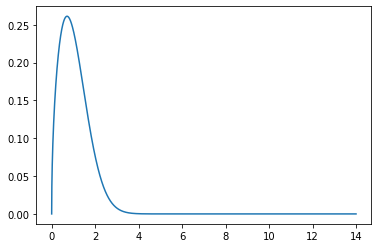

In [ ]:
# plot pdf
x = np.linspace(0, 14, 10000)
y = np.array([chisq_pdf(3,i) for i in x])

plt.plot(x,y)

In [ ]:
# chisq cdf
def chisq_cdf(df, x):
    return (1 / ss.gamma(df / 2)) * ss.gammainc(df / 2, x / 2)

In [ ]:
chisq_cdf(3, 5)

In [ ]:
# chisq integral of pdf 
def chisq_p(df, x_lower=None, x_upper=0):
    if x_lower is None:
        return scipy.integrate.quad(chisq_pdf, 0, x_upper, args=(df))[0]
    return scipy.integrate.quad(chisq_pdf, x_lower, x_upper, args=(df))[0]

In [ ]:
chisq_p(3, x_upper=5)

0.028210992432497802

approximating gamma function using quadratures

In [ ]:
def gamma_approx(z):
    func = lambda x,z: np.power(x, z-1)*np.exp(-1)
    return integrate.quad(func, 0, np.inf, args=(z))[0]

In [ ]:
gamma_approx(np.pi)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ss.gamma(np.pi)

#### generating random numbers from a given distribution

In [ ]:
# random selection over uniform distribution
# wrap the randomizer over some probability distribution
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as ss
from scipy import integrate

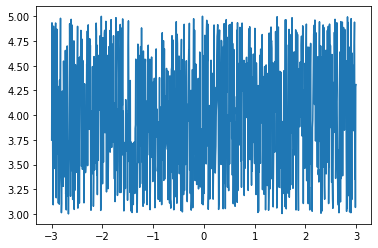

In [ ]:
x = np.linspace(-3,3,1000)
y = np.array([rd.uniform(3,5) for i in x])
plt.plot(x,y)

In [ ]:
def rvs_normaldist(threshold = 1000, mean=0, std=1):
    pdf = lambda mean, std, x: (1/(std*np.sqrt(2*np.pi)))*np.exp(-((x-mean)/std)**2)
    cdf = lambda mean, std, x: (1/2)*(1+ss.erf((x-mean)/(std*np.sqrt(2))))
    x = np.linspace(-6,6,threshold)
    y = np.array([pdf(mean, std, i) for i in x])
    p = np.array([cdf(std, mean, i) for i in x])
    return np.random.choice(y, p=p)
    # return plt.plot(x,y)

In [ ]:
t = 1000
x1 = np.linspace(-5,5,t)
y = np.array([rvs_normaldist(threshold=t) for i in x1])
plt.plot(x1,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

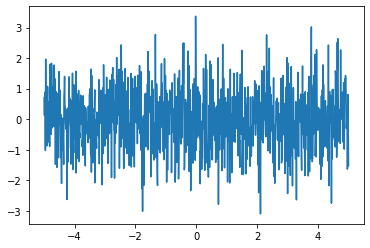

In [ ]:
t = 1000
x1 = np.linspace(-5,5,t)
y = np.array([rd.gauss(0,1)for i in x1])
plt.plot(x1,y)


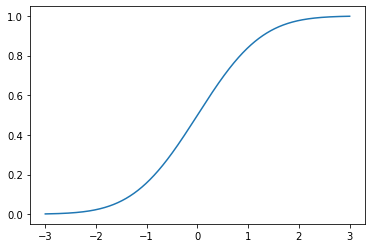

In [ ]:
cdf = lambda mean, std, x: (1/2)*(1+ss.erf((x-mean)/(std*np.sqrt(2))))
x1 = np.linspace(-3,3,1000)
yz = np.array([normal_cdf(0,1,i) for i in x1])
plt.plot(x1,yz)

In [ ]:
# function
def normal_pdf(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

In [ ]:
# class 
class Normal:
    def pdf(self,x):
        return 1 / np.sqrt(2 * np.pi) * np.exp(-x**2 / 2)

The slowest run took 4.09 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 4.63 ms per loop


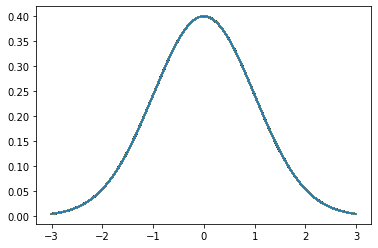

In [ ]:
%%timeit
x = np.linspace(-3,3,1000)
y = np.array([normal_pdf(i) for i in x])
plt.plot(x,y)

The slowest run took 5.08 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 4.7 ms per loop


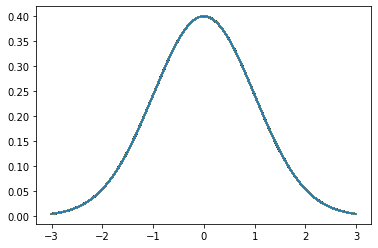

In [ ]:
%%timeit
x = np.linspace(-3,3,1000)
obj = Normal()
y2 = np.array([obj.pdf(i) for i in x])
plt.plot(x,y2)

In [ ]:
generator = lambda mu, sig, x: 1/2*(1+ss.erf((x-mu)/(sig*np.sqrt(2))))
generator(0,1,-np.inf)

0.0

# Inverse Random Variate Generation by Inverse Transform Sampling 

Supported Distributions
- Exponential
- Cauchy
- Rayleigh
- Triangular
- Pareto
- Logistic
- Weibull
----
Discrete
- Geometric

In [28]:
def inv_exponential(_lambda):
    return (-1/_lambda)*np.log(1-np.random.uniform(0,1))

(array([505., 244., 116.,  67.,  34.,  17.,   8.,   6.,   2.,   1.]),
 array([1.56336914e-04, 3.33087556e-01, 6.66018775e-01, 9.98949994e-01,
        1.33188121e+00, 1.66481243e+00, 1.99774365e+00, 2.33067487e+00,
        2.66360609e+00, 2.99653731e+00, 3.32946853e+00]),
 <a list of 10 Patch objects>)

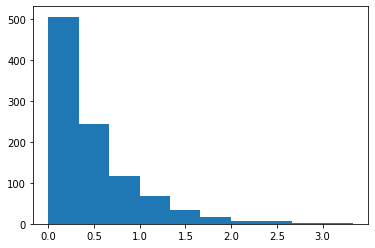

In [29]:
x_exp = np.linspace(0, 1, 1000)
y_exp = np.array([inv_exponential(2) for i in x_exp])

plt.hist(y_exp)

In [30]:
def inv_cauchy(sig):
    return sig*np.tan(np.pi*(np.random.uniform(0,1)-0.5))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   2., 968.,  29.]),
 array([-23890.81819003, -21186.9643668 , -18483.11054356, -15779.25672032,
        -13075.40289708, -10371.54907384,  -7667.69525061,  -4963.84142737,
         -2259.98760413,    443.86621911,   3147.72004234]),
 <a list of 10 Patch objects>)

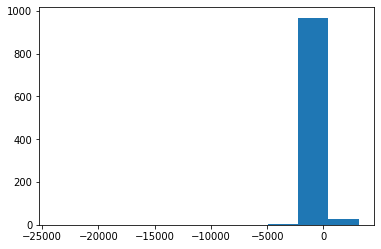

In [32]:
x_cauchy = np.linspace(0, 1, 1000)
y_cauchy = np.array([inv_cauchy(20) for i in x_exp])

plt.hist(y_cauchy)

In [33]:
def inv_rayleigh(sig):
    return sig*np.sqrt(-np.log(np.random.uniform(0,1)))

(array([ 74., 188., 210., 217., 130.,  91.,  49.,  26.,  10.,   5.]),
 array([0.03761097, 0.55140379, 1.06519662, 1.57898944, 2.09278227,
        2.60657509, 3.12036792, 3.63416074, 4.14795357, 4.66174639,
        5.17553922]),
 <a list of 10 Patch objects>)

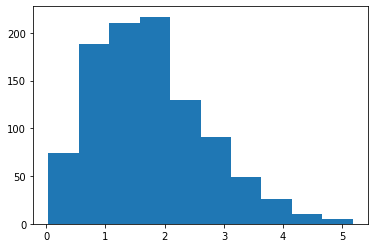

In [34]:
x_rayleigh = np.linspace(0, 1, 1000)
y_rayleigh = np.array([inv_rayleigh(2) for i in x_rayleigh])

plt.hist(y_rayleigh)

In [35]:
def inv_triangular(a):
    return a*(1-np.sqrt(np.random.uniform(0,1)))

(array([190., 155., 149., 129., 114.,  80.,  64.,  61.,  32.,  26.]),
 array([0.00262654, 0.19808012, 0.39353371, 0.58898729, 0.78444088,
        0.97989446, 1.17534805, 1.37080163, 1.56625522, 1.7617088 ,
        1.95716239]),
 <a list of 10 Patch objects>)

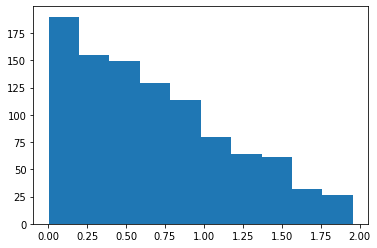

In [36]:
x_triangular = np.linspace(0, 1, 1000)
y_triangular = np.array([inv_triangular(2) for i in x_triangular])

plt.hist(y_triangular)

In [ ]:
def inv_pareto(a,b):
    return b/(np.power(1-np.random.uniform(0,1), 1/a))

In [ ]:
def inv_logistic(mu, b):
    return mu-b*(np.log(1-(np.random.uniform(0,1))))

In [ ]:
def inv_weilbull_dist(a,b):
    return a*np.power(np.log(np.random.uniform(0,1)), 1/b)

In [ ]:
def inv_geom(p):
    return np.ceil(np.log(np.random.uniform(0,1))/np.log(1-p))

inverse gamma sampling 
see: https://wiki.math.uwaterloo.ca/statwiki/index.php?title=techniques_for_Normal_and_Gamma_Sampling

In [13]:
def inv_gamma_sampling(t, _lambda):
    return (-1/_lambda)*np.log(np.prod([np.random.uniform(0,1) for i in range(1,t)]))

(array([ 3.,  2.,  4.,  0.,  4.,  4.,  4.,  3.,  5.,  3.,  6.,  2.,  6.,
         8.,  6.,  6.,  5.,  6.,  5., 12.,  7., 10.,  5., 16., 10., 17.,
        15., 11., 10., 10., 13., 11., 16., 17., 10., 10., 12., 15., 11.,
        14.,  9., 21., 16., 15., 13.,  9., 20., 15., 21., 21., 19., 15.,
        20., 19., 22., 20., 20., 21., 23., 15., 18., 17., 15., 20., 14.,
        19., 17., 15., 23., 23., 22.,  8., 18., 16., 12., 17., 19., 17.,
        18., 17., 20., 13., 20., 24., 17., 16., 16., 19., 19., 14., 17.,
        21., 22., 14., 20., 12., 24., 20., 12., 20., 13., 19., 22., 18.,
        17., 19., 19., 18., 18., 18., 18., 13., 18., 16., 18., 16., 14.,
        14., 13., 22., 22., 13., 21., 20., 19., 17., 22., 10., 23., 17.,
        13., 12., 24., 17., 19., 17., 20., 20., 20., 22., 15., 17., 17.,
        15., 18., 13., 22., 15., 21., 18., 13., 14., 18., 17., 22., 15.,
        17., 19., 19., 12., 12., 24., 18., 23., 14., 16., 14., 20., 17.,
        18., 11., 13., 18., 17., 10., 12., 18., 19.

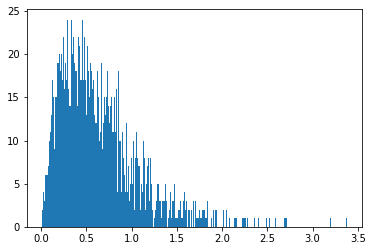

In [27]:
_lambda = 3
x_gamma = np.array([i for i in range(0, 5000)])
y_gamma = np.array([inv_gamma_sampling(3, _lambda) for i in x_gamma])

plt.hist(y_gamma, bins=1000)